# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option("display.max_columns",50)

# Importing a dataset and getting a View

In [2]:
train_df = pd.read_csv("F:/ETL/Project/HR_analitics/HR-Employee-Attrition-Table.csv")
train_df.head() # getting overview of first 5 rows

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
train_df.shape # to know number of rows and column

(1470, 35)

In [6]:
train_df.info() # Get Basic Info in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking Uniques Values of Each Column

In [7]:
train_df.nunique() # check the unique values in each column

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Above we can see There are 3 columns with Constant Values
#### EmployeeNumber is a discrete Column

In [10]:
# we can drop those columns
train_df = train_df.drop(labels = ["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis = 1)

In [11]:
train_df.shape

(1470, 31)

In [12]:
train_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# Distinguish between Catagorical and Continuous Columns

In [14]:
# the columns which has less than 15 unique values can be treated as catogorical column
train_df[list(train_df.nunique()[train_df.nunique() < 15].index)] 

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,1,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,8,Yes,3,1,0,0,1
1,0,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,1,No,4,4,1,3,3
2,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,6,Yes,3,2,0,3,3
3,0,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,1,Yes,3,3,0,3,3
4,0,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,9,No,3,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,Travel_Frequently,Research & Development,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,4,No,3,3,1,3,3
1466,0,Travel_Rarely,Research & Development,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,4,No,3,1,1,5,3
1467,0,Travel_Rarely,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,1,Yes,4,2,1,0,3
1468,0,Travel_Frequently,Sales,3,Medical,4,Male,2,2,Sales Executive,2,Married,2,No,3,4,0,3,2


In [15]:
cat = list(train_df.nunique()[train_df.nunique() < 15].index)
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [16]:
# not every column can be treated like catgorical
cat.remove("NumCompaniesWorked")
cat.remove("TrainingTimesLastYear")

In [18]:
# loop through all the columns and convert catogorical column to Object Datatype
for i in train_df.columns:
    if i in cat:
        train_df[i] = train_df[i].astype(str)

In [19]:
# use predefine catcon function to seperate catagorical and continous columns
from PM12 import catcon
cat,con = catcon(train_df)

In [20]:
print(con) # list of continuous columns
len(con)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


14

In [21]:
print(cat) # list of all catagorical columns
len(cat)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


17

# Exploratory Data Analysis

<AxesSubplot:ylabel='Attrition'>

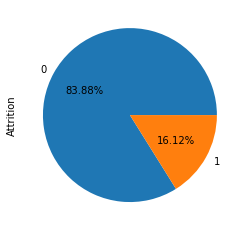

In [42]:
# Univariate Analysis on all categorical columns
train_df["Attrition"].value_counts().plot(kind = 'pie',autopct='%1.2f%%')

Attrition rate is about 16.12%

As Our Dependent Column is catagorical we will be using Chi square Test

# Chi Square Test (relation between two catogorical variables)

In [73]:
from scipy.stats import chi2_contingency

In [74]:
def chisquare(cat1,cat2,df):
    import pandas as pd
    Q = pd.crosstab(df[cat1],df[cat2])
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(Q)
    return a

In [76]:
chisquare("Attrition","BusinessTravel",train_df)

24.182413685655174

In [78]:
for i in cat:
    e = chisquare(i,"Attrition",train_df)
    e = round(e,2)
    print("Attrition ~",i,"--->",e)

Attrition ~ Attrition ---> 1462.61
Attrition ~ BusinessTravel ---> 24.18
Attrition ~ Department ---> 10.8
Attrition ~ Education ---> 3.07
Attrition ~ EducationField ---> 16.02
Attrition ~ EnvironmentSatisfaction ---> 22.5
Attrition ~ Gender ---> 1.12
Attrition ~ JobInvolvement ---> 28.49
Attrition ~ JobLevel ---> 72.53
Attrition ~ JobRole ---> 86.19
Attrition ~ JobSatisfaction ---> 17.51
Attrition ~ MaritalStatus ---> 46.16
Attrition ~ OverTime ---> 87.56
Attrition ~ PerformanceRating ---> 0.0
Attrition ~ RelationshipSatisfaction ---> 5.24
Attrition ~ StockOptionLevel ---> 60.6
Attrition ~ WorkLifeBalance ---> 16.33


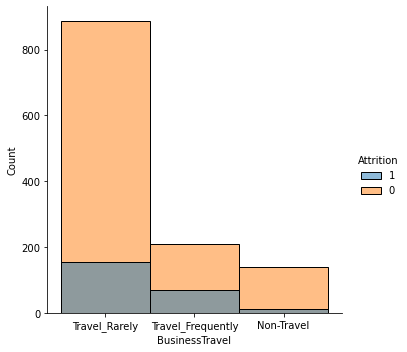

In [44]:
sns.displot(data = train_df, x = "BusinessTravel", hue = "Attrition")

Here We can see people who travel rarely or not travel resigned less

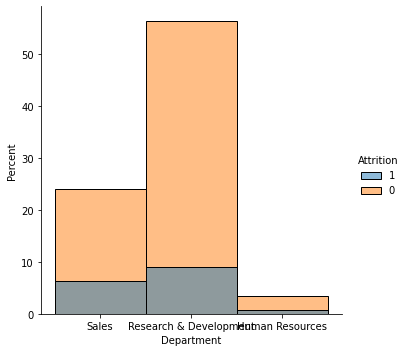

In [46]:
sns.displot(data = train_df, x = "Department", hue = "Attrition",stat='percent')

In [47]:
groupbyD = train_df.groupby("Department")["Attrition"]
print(groupbyD.value_counts())

Department              Attrition
Human Resources         0             51
                        1             12
Research & Development  0            828
                        1            133
Sales                   0            354
                        1             92
Name: Attrition, dtype: int64


about 20% people left from HR <br>
about 14% people left from R&D <br>
about 21% people left from Sales <br>

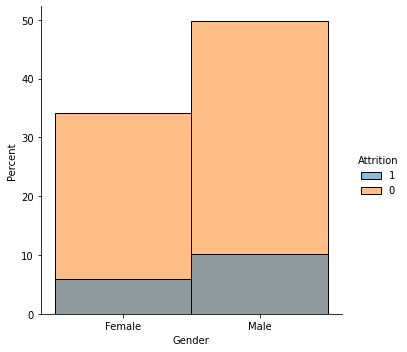

In [49]:
sns.displot(data = train_df, x = "Gender", hue = "Attrition",stat='percent')

Male or female employee doesnt have much difference in attrition

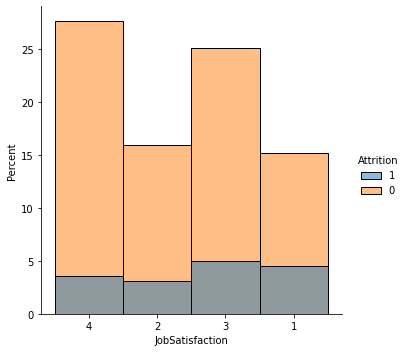

In [52]:
sns.displot(data = train_df, x = "JobSatisfaction", hue = "Attrition",stat='percent')

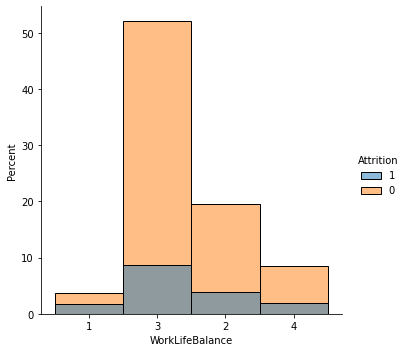

In [53]:
sns.displot(data = train_df, x = "WorkLifeBalance", hue = "Attrition",stat='percent')

Those With Least Work Life Balance Left the most

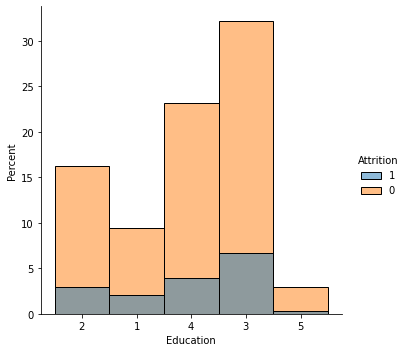

In [55]:
sns.displot(data = train_df, x = "Education", hue = "Attrition",stat='percent')

Those With Phd left Least While Those With Education 3,4 left the most

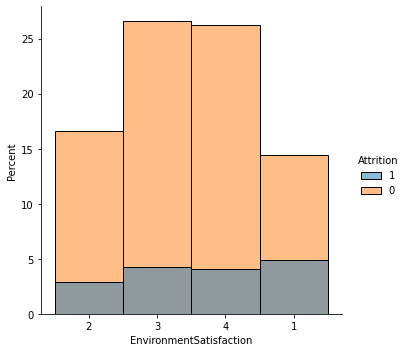

In [57]:
sns.displot(data = train_df, x = "EnvironmentSatisfaction", hue = "Attrition",stat='percent')

while looking percent wise more people from low environment satisfaction left

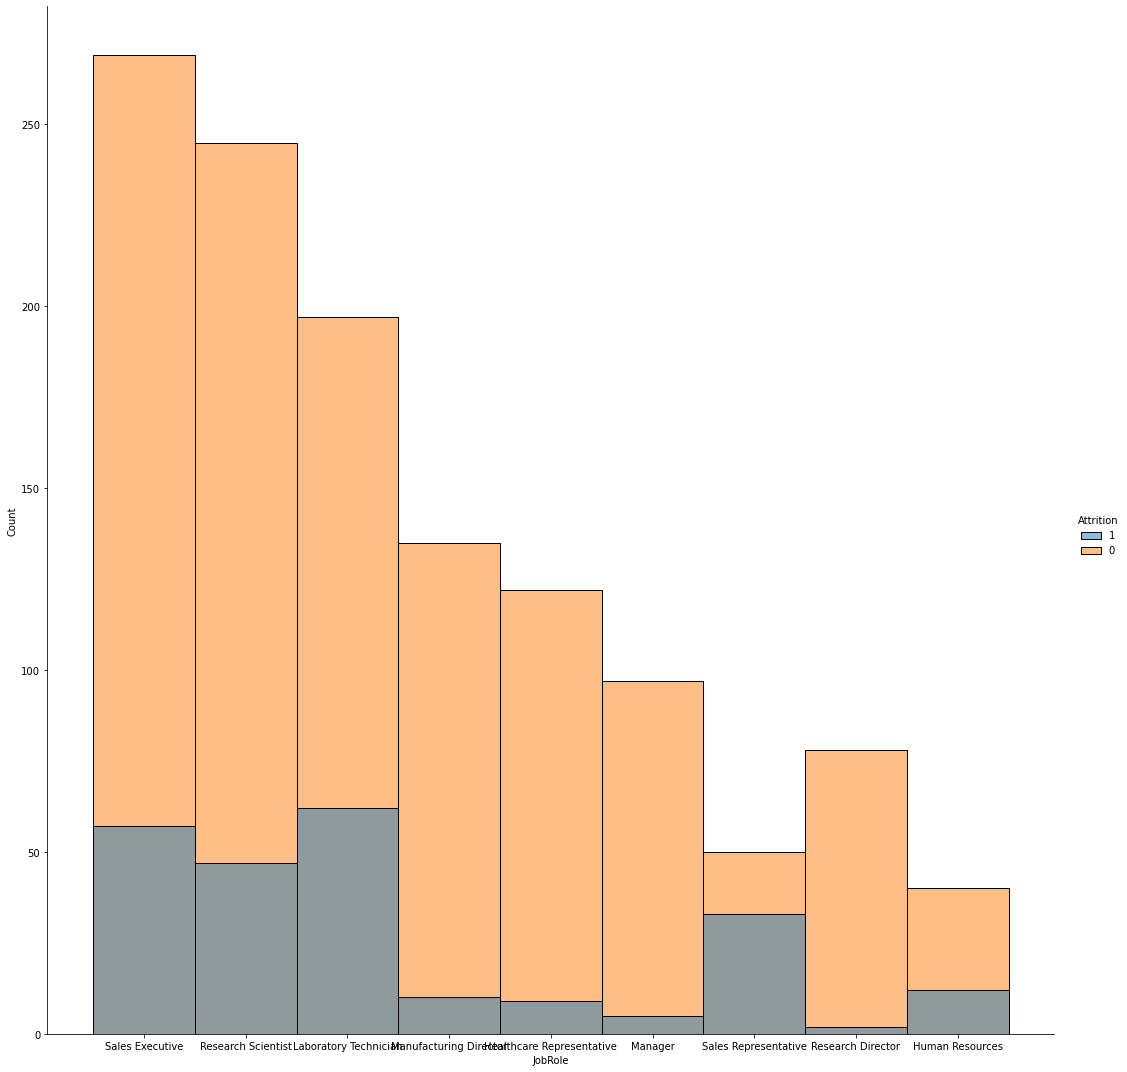

In [60]:
sns.displot(data = train_df, x = "JobRole", hue = "Attrition",height=15)

most of the sales representative left the Company

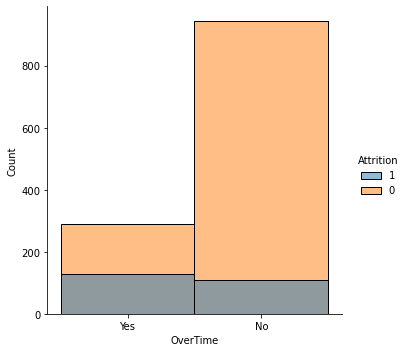

In [62]:
sns.displot(data = train_df, x = "OverTime", hue = "Attrition")

Most of the people who does Overtime left the Company

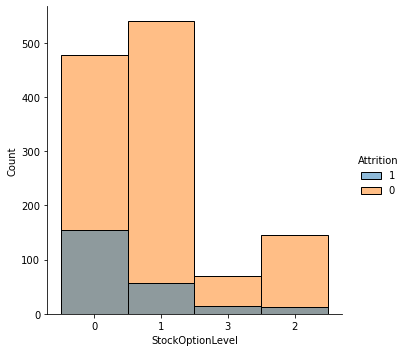

In [79]:
sns.displot(data = train_df, x = "StockOptionLevel", hue = "Attrition")

People With Low StockoptionLevel left the Most

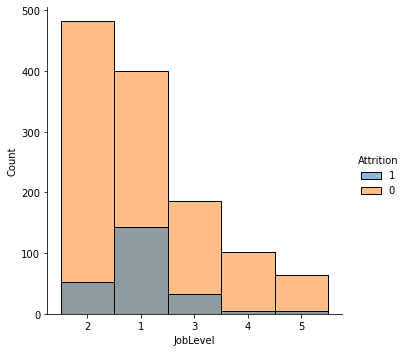

In [80]:
sns.displot(data = train_df, x = "JobLevel", hue = "Attrition")

People With Low job level left the most

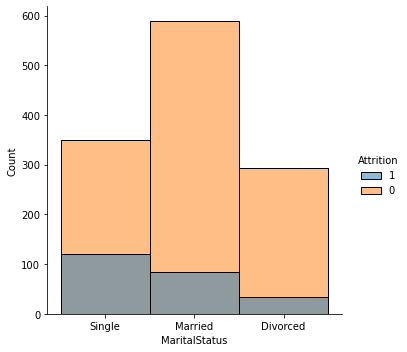

In [81]:
sns.displot(data = train_df, x = "MaritalStatus", hue = "Attrition")

From Above Analysis We can drop the least Variance Data<br>

Attrition ~ BusinessTravel ---> 24.18<br>
Attrition ~ Department ---> 10.8<br>
Attrition ~ Education ---> 3.07<br>
Attrition ~ EducationField ---> 16.02<br>
Attrition ~ EnvironmentSatisfaction ---> 22.5<br>
Attrition ~ Gender ---> 1.12<br>
Attrition ~ JobInvolvement ---> 28.49<br>
Attrition ~ JobLevel ---> 72.53<br>
Attrition ~ JobRole ---> 86.19<br>
Attrition ~ JobSatisfaction ---> 17.51<br>
Attrition ~ MaritalStatus ---> 46.16<br>
Attrition ~ OverTime ---> 87.56<br>
Attrition ~ PerformanceRating ---> 0.0<br>
Attrition ~ RelationshipSatisfaction ---> 5.24<br>
Attrition ~ StockOptionLevel ---> 60.6<br>
Attrition ~ WorkLifeBalance ---> 16.33<br>

Performance Rating , Education ,Gender , RelationShip Satisfication <br>
above columns can has low or no variance with Attririon rate so we can Drop Those

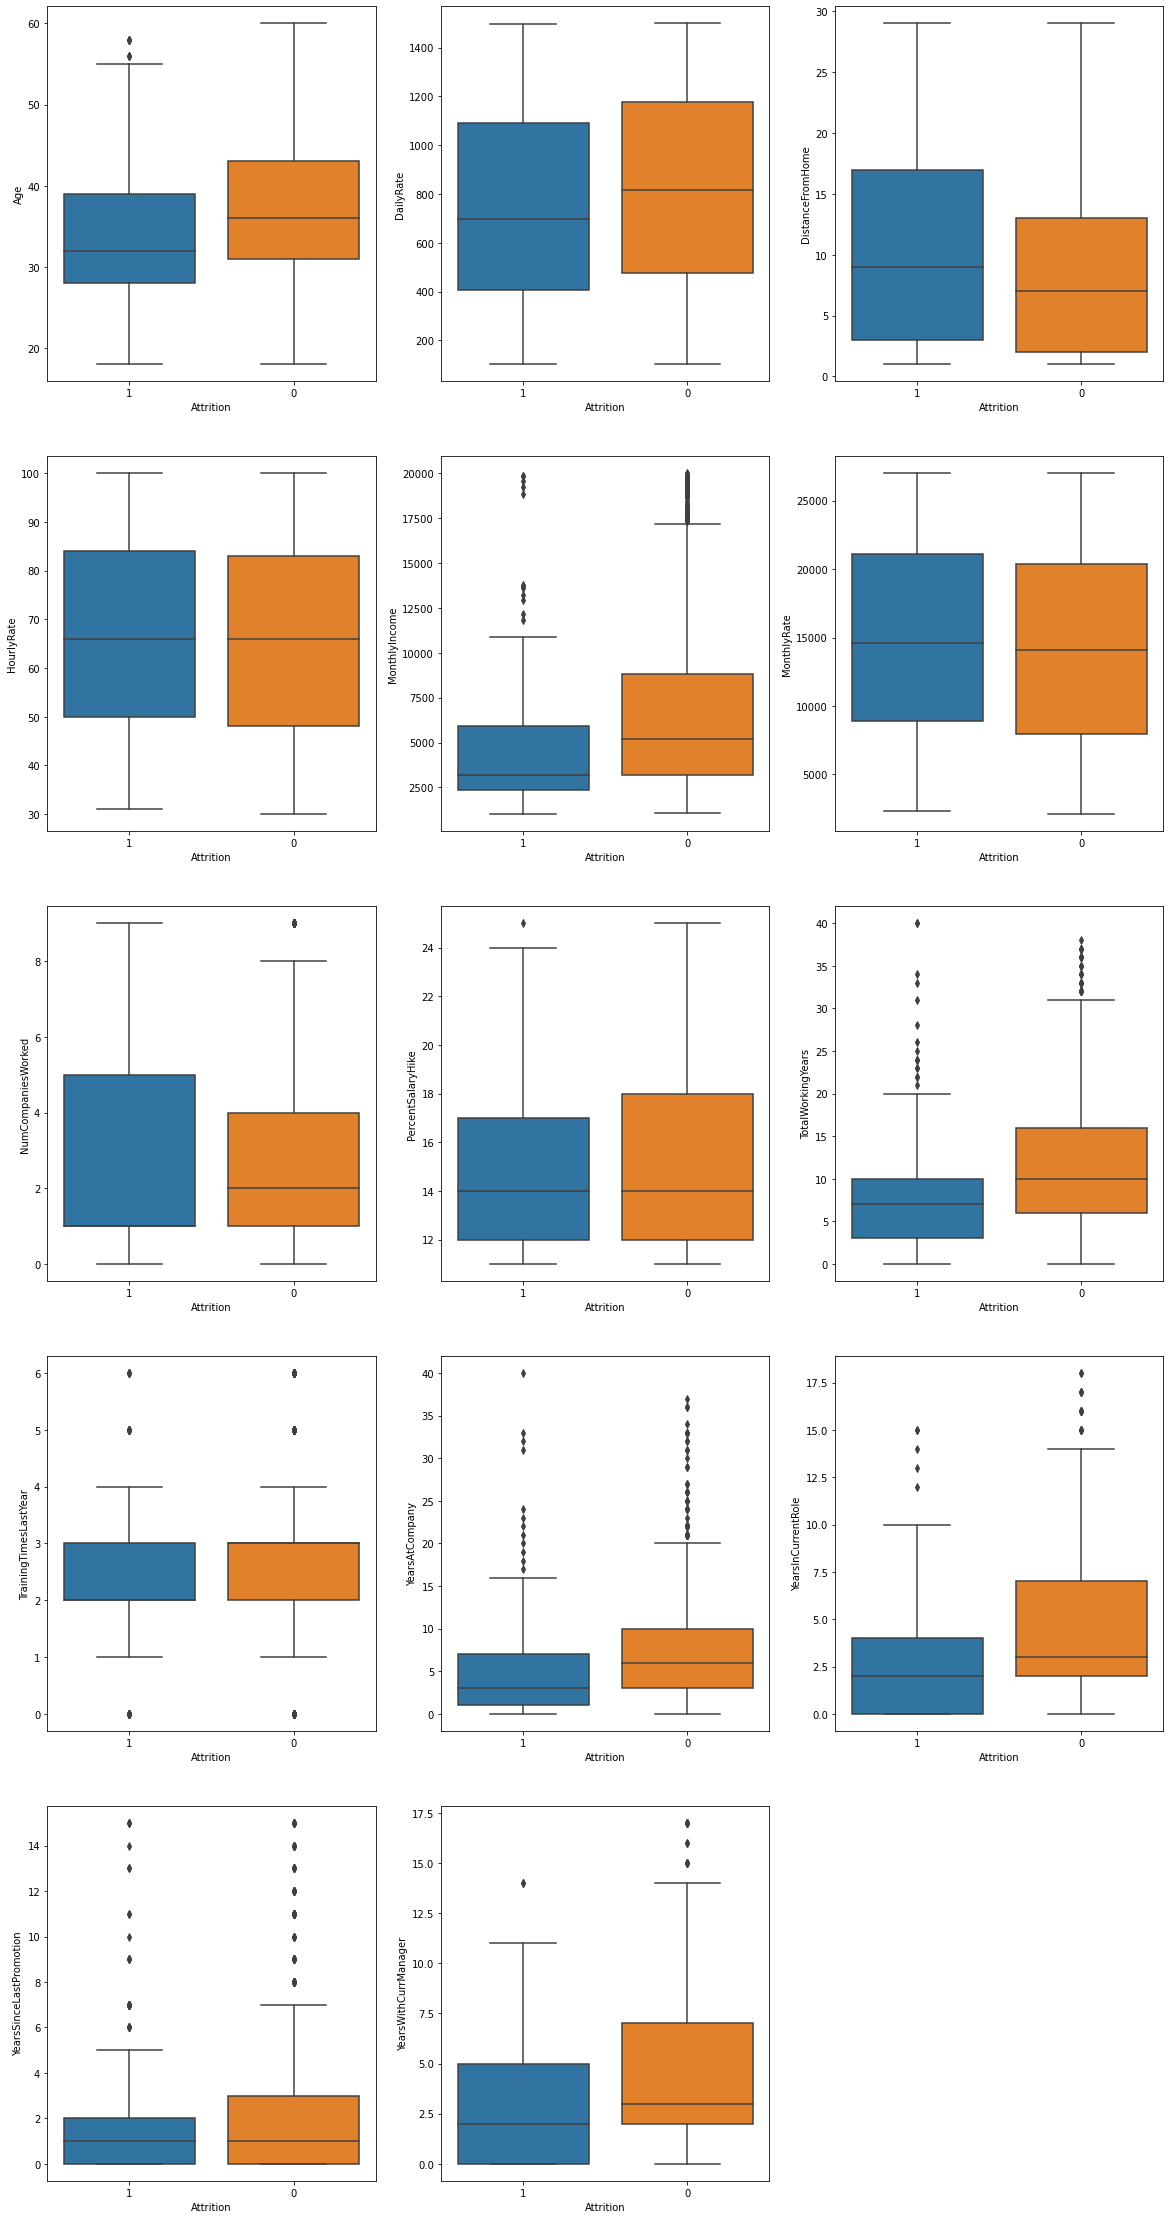

In [90]:
plt.figure(figsize = (20,40))
count = 1
for i in con:
    plt.subplot(5,3,count)
    sns.boxplot(train_df["Attrition"],train_df[i])
    count += 1

HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,<br>
Performance Rating , Education ,Gender , RelationShip Satisfication<br>
Above Columns Has Low Relation With The Attritation so we can drop these

In [95]:
cols_to_drop = ['HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear',
'PerformanceRating','Education','Gender','RelationshipSatisfaction']
train_df = train_df.drop(labels = cols_to_drop , axis =1)

In [97]:
train_df.shape

(1470, 22)

In [98]:
train_df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,Life Sciences,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,Life Sciences,3,2,2,Research Scientist,2,Married,5130,No,1,10,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,Other,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,Medical,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,3,2,2,2,2


# Outlier Treatment

In [111]:
from PM12 import catcon
cat,con = catcon(train_df)

In [112]:
#using Z-score method to deal with outliers
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(train_df[con]),columns=con) #scaling data in range of -3 to 3

In [113]:
outliers=[]
for i in con:
    outliers.extend(df1[(df1[i]<-3)|(df1[i]>3)].index) # the row which has value less than -3 or more than 3 is Outlier

In [114]:
out=np.unique(outliers)
len(out)

83

In [115]:
train_df=train_df.drop(index=out,axis=0) # we can drop all those outliers

In [116]:
train_df.shape[0]

1387

In [117]:
train_df.index=range(0,train_df.shape[0],1) # after droping rows with outlier we have to reindex the dataframe

# Spliting Dataset into X And Y Variable

In [118]:
X=train_df.drop(labels=["Attrition"],axis=1)
Y=train_df[["Attrition"]]

In [119]:
cat,con = catcon(X) # split columns Types

In [120]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'StockOptionLevel',
 'WorkLifeBalance']

In [121]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Data Preprocessing

In [122]:
from sklearn.preprocessing import MinMaxScaler
Global_MS = MinMaxScaler()
X1=pd.DataFrame(Global_MS.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

In [123]:
Xnew.head()

,Age,DailyRate,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.547619,0.716332,0.000000,0.263230,0.235294,0.24,0.266667,0.000000,0.357143,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0
1,0.738095,0.126791,0.250000,0.217651,0.294118,0.40,0.466667,0.090909,0.500000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,0.452381,0.910458,0.035714,0.057093,0.205882,0.00,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0
3,0.357143,0.924069,0.071429,0.100349,0.235294,0.32,0.466667,0.272727,0.000000,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,0.214286,0.350287,0.035714,0.129872,0.176471,0.08,0.133333,0.181818,0.142857,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [124]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [125]:
Y

array([1, 0, 1, ..., 0, 0, 0])

# Model 1 (Logistic Regression)

In [140]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.3,random_state=42)

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [134]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [135]:
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,tr_pred),2)
ts_acc = round(accuracy_score(ytest,ts_pred),2)
tr_acc,ts_acc

(0.9, 0.86)

# Model 2 (Decision tree Classifier)

In [178]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.3,random_state=42)

In [179]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42,criterion="gini")
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)
tr_acc,ts_acc

(1.0, 0.82)

Here Decison Tree Classifier overfits on training Data

In [171]:
def tree(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    return tr_acc,ts_acc

### Decision Tree Classifier with Max Depth

In [172]:
tr = []
ts = []
for i in range(2,20,1):
    dtc = DecisionTreeClassifier(random_state=42,max_depth=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)

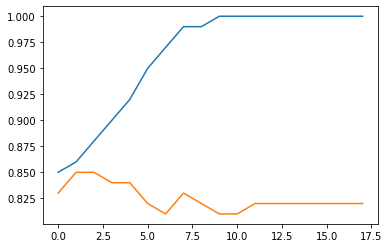

In [173]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [174]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=4)
tra,tsa = tree(dtc)
tra,tsa

(0.88, 0.85)

### Minimum Sample Split

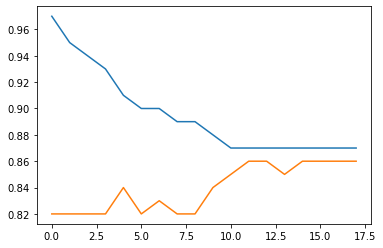

In [175]:
tr = []
ts = []
for i in range(2,20,1):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [166]:
dtc = DecisionTreeClassifier(random_state=42,min_samples_leaf= 13)
tra,tsa = tree(dtc)
tra,tsa

(0.87, 0.86)

# Model 3 (Random Forest Classifier)

In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15,oob_score=True)
tree(rfc)

(1.0, 0.85)

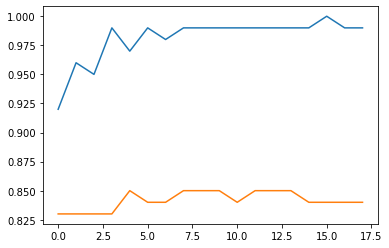

In [183]:
tr = []
ts = []
for i in range(2,20,1):
    rfc = RandomForestClassifier(n_estimators=i,oob_score=True)
    tra,tsa = tree(rfc)
    tr.append(tra)
    ts.append(tsa)
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [186]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=7,oob_score=True)
tree(rfc)

(0.98, 0.85)

# Model 4 Adaptive Boosting

In [195]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2),n_estimators=8)
tree(abc)

(0.89, 0.85)

# Model 5 KNN

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier(n_neighbors=5)
model = knr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)
tr_acc,ts_acc

(0.88, 0.86)